<a href="https://colab.research.google.com/github/JuanGarcia88/Definitivo/blob/main/Taller2_Gen_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

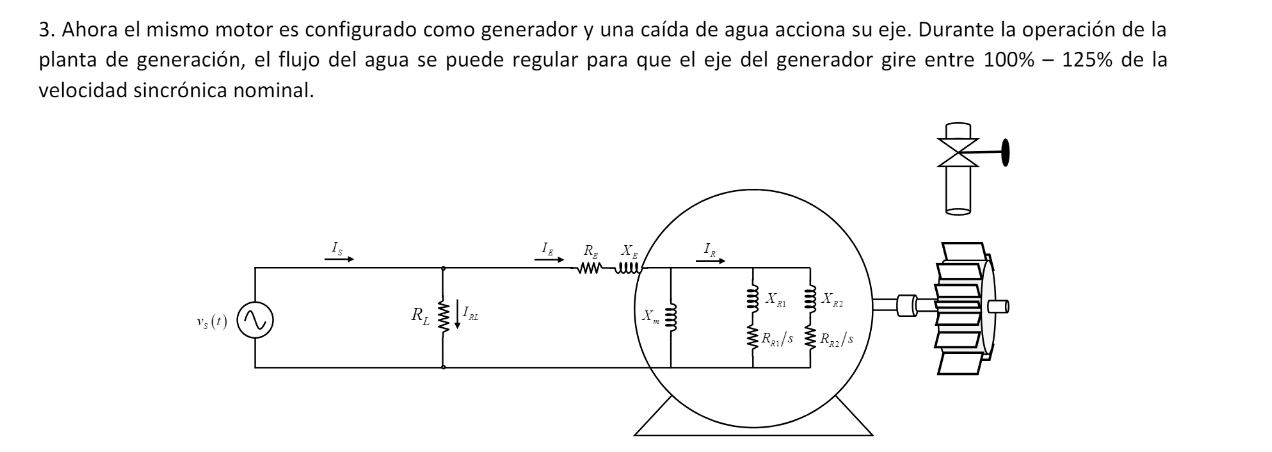

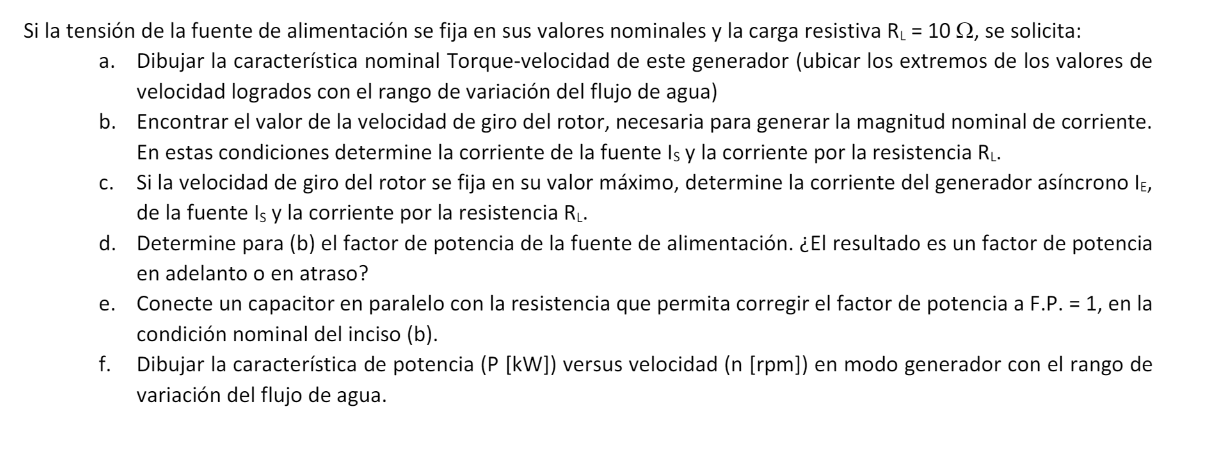

In [118]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import cmath
f = 60

In [119]:
Rs = 0.5907
Xs = (2*np.pi*f)*(0.0009007)
Xm = (2*np.pi*f)*(0.03498)
R1 = 0.3492
X1 = (2*np.pi*f)*(0.004182)
R2 = 0.3503
X2 = (2*np.pi*f)*((0.0009007))

##girando al 100 de la velocidad sincronica nominal
Ns = 900
Nn = 900

## girando al 125 de la velocidad sincronica nominal
Nn2 = (125 * 900)/100


In [120]:
Sn = (Ns - Nn ) / Ns
print(Sn)

0.0


In [121]:
Sn0 = (Ns - Nn2 ) / Ns
print(Sn0)

-0.25


In [122]:
Rr =(R1*R2*(R1+R2)+Sn**2*(R1*X2**2+R2*X1**2)) / ((R1+R2)**2+Sn**2*(X1+X2)**2)
Xr = (R1**2 * X2 + R2**2 * X1 + Sn**2 * X1 * X2 * (X1 + X2)) / ((R1 + R2)**2 + Sn**2 * (X1 + X2)**2)

pp1=(1j*Xm*((Rr/0.0000001)+1j*Xr))/(1j*Xm+((Rr/0.0000001)+1j*Xr))
Zeq_N=Rs+1j*Xs+(pp1)
r1, theta1 = abs(Zeq_N), cmath.phase(Zeq_N)

In [123]:
Ws = ((2*np.pi)/60)*Ns
print(Ws)

94.24777960769379


In [124]:
Vth = 380*((Xm)/(((Rs**2)+((Xs+Xm)**2))**0.5))
Zth = (((complex(0, Xm))*(Rs + complex(0, Xs))/(Rs + (complex(0, Xs)+ complex(0, Xm)))))
Rth = Zth.real
Xth = Zth.imag

In [125]:
Te_N = (((3*(Vth**2))*(Rr/0.0000001))/((Ws*((Rth + (Rr/0.0000001))**2+((Xth + Xr)**2)))))
print(Te_N)

0.0024933358145238504


In [126]:
Rr0 =(R1*R2*(R1+R2)+Sn0**2*(R1*X2**2+R2*X1**2)) / ((R1+R2)**2+Sn0**2*(X1+X2)**2)
Xr0 = (R1**2 * X2 + R2**2 * X1 + Sn0**2 * X1 * X2 * (X1 + X2)) / ((R1 + R2)**2 + Sn0**2 * (X1 + X2)**2)

In [127]:
Te_N0 = (((3*(Vth**2))*(Rr0/Sn0))/((Ws*((Rth + (Rr0/Sn0))**2+((Xth + Xr0)**2)))))
print(Te_N0)

-5325.469703657552


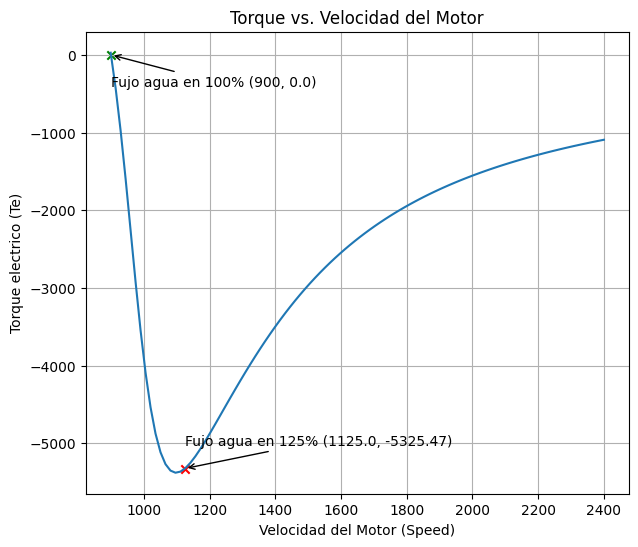

In [128]:
Speed = np.linspace(899, 2400, 100)
Sn_plot=(900-Speed)/900
Rr_plot= (R1*R2*(R1+R2)+(Sn_plot**2)*(R1*X2**2+R2*X1**2)) / ((R1+R2)**2+(Sn_plot)**2*(X1+X2)**2)
Xr_plot = (R1**2 * X2 + R2**2 * X1 + (Sn_plot**2) * X1 * X2 * (X1 + X2)) / ((R1 + R2)**2 + (Sn_plot**2) * (X1 + X2)**2)


Te_PLOT = (((3*(Vth**2))*(Rr_plot/Sn_plot))/((Ws*((Rth + (Rr_plot/Sn_plot))**2+((Xth + Xr_plot)**2)))))


plt.figure(figsize=(7, 6))
plt.plot(Speed, Te_PLOT)
plt.xlabel('Velocidad del Motor (Speed)')
plt.ylabel('Torque electrico (Te)')
plt.title('Torque vs. Velocidad del Motor')
plt.scatter(Nn, Te_N, marker= 'x', color='green')
plt.annotate('Fujo agua en 100% ({}, {})'.format(round(Nn,2), round(Te_N,2)),
             xy=(Nn, Te_N),
             xytext=(Nn+1, Te_N-400),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.scatter(Nn2, Te_N0, marker= 'x', color='red')
plt.annotate('Fujo agua en 125% ({}, {})'.format(round(Nn2,2), round(Te_N0,2)),
             xy=(Nn2, Te_N0),
             xytext=(Nn2+1, Te_N0+300),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.grid(True)
plt.show()

El punto de cruce más cercano ocurre en Speed = 916.4791886979717 y Corriente nominal = 51.78542957380776


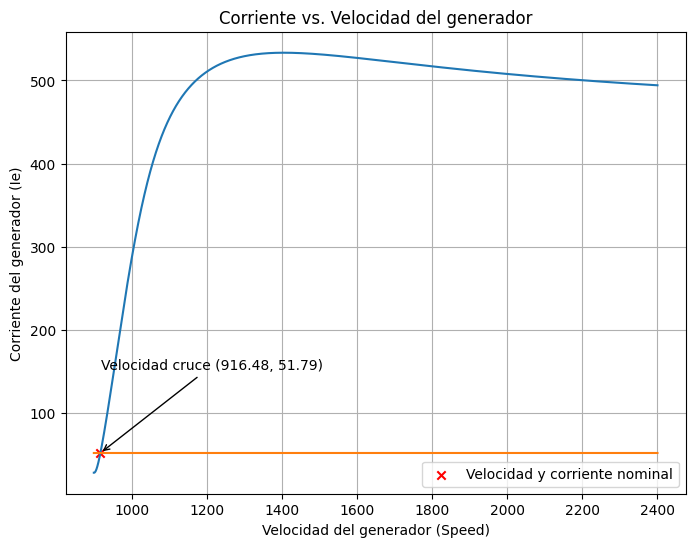

In [129]:
Speed = np.linspace(899, 2400, 400000)
Sn_plot=(Ns-Speed)/Ns

Rr_plot= (R1*R2*(R1+R2)+(Sn_plot**2)*(R1*X2**2+R2*X1**2)) / ((R1+R2)**2+(Sn_plot)**2*(X1+X2)**2)
Xr_plot = (R1**2 * X2 + R2**2 * X1 + (Sn_plot**2) * X1 * X2 * (X1 + X2)) / ((R1 + R2)**2 + (Sn_plot**2) * (X1 + X2)**2)

pp0=(1j*Xm*((Rr_plot/Sn_plot)+1j*Xr_plot))/(1j*Xm+((Rr_plot/Sn_plot)+1j*Xr_plot))

Zeq_plot=Rs+1j*Xs+(pp0)
r_plot = abs(Zeq_plot)
Ie = 380/r_plot
Corriente_nominal = 51.78542957380776
Corriente_nominal_vector = np.full_like(Speed, Corriente_nominal)
puntos_de_cruce = []

punto_de_cruce = None
distancia_minima = float('inf')

for i in range(len(Speed)):
    distancia_actual = abs(Ie[i] - Corriente_nominal)
    if distancia_actual < distancia_minima:
        distancia_minima = distancia_actual
        punto_de_cruce = (Speed[i], Corriente_nominal_vector[i])

if punto_de_cruce is not None:
    print(f"El punto de cruce más cercano ocurre en Speed = {punto_de_cruce[0]} y Corriente nominal = {punto_de_cruce[1]}")

plt.figure(figsize=(8, 6))
plt.plot(Speed, Ie)
plt.plot(Speed, Corriente_nominal_vector)
plt.xlabel('Velocidad del generador (Speed)')
plt.ylabel('Corriente del generador (Ie)')
plt.title('Corriente vs. Velocidad del generador')
plt.scatter(punto_de_cruce[0], punto_de_cruce[1], color = 'red', marker = 'x', label= 'Velocidad y corriente nominal')
plt.annotate('Velocidad cruce ({}, {})'.format(round(punto_de_cruce[0],2), round(punto_de_cruce[1],2)),
             xy=(punto_de_cruce[0], punto_de_cruce[1]),
             xytext=(punto_de_cruce[0]+1, punto_de_cruce[1]+100),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [130]:
## punto b
## girando a velocidad nominal

Nn3 = punto_de_cruce[0]
Sn1 = (Ns - Nn3)/Ns
Rr =(R1*R2*(R1+R2)+Sn1**2*(R1*X2**2+R2*X1**2)) / ((R1+R2)**2+Sn1**2*(X1+X2)**2)
Xr = (R1**2 * X2 + R2**2 * X1 + Sn1**2 * X1 * X2 * (X1 + X2)) / ((R1 + R2)**2 + Sn1**2 * (X1 + X2)**2)

pp12=(1j*Xm*((Rr/Sn1)+1j*Xr))/(1j*Xm+((Rr/Sn1)+1j*Xr))
Zeq_N2=Rs+1j*Xs+(pp12)
r2, theta2 = abs(Zeq_N2), cmath.phase(Zeq_N2)
Is_g = 380/Zeq_N2
y1, z1 = abs(Is_g), cmath.phase(Is_g)
Ie_Nominal = 380/ r2

print(f"la corriente Ie es = {y1}∠{z1}")

la corriente Ie es = 51.787365001618745∠-2.395008025971569


In [131]:
Irl_nom = 380/10
Is_nom = Is_g + Irl_nom
r0, theta0 = abs(Is_nom), cmath.phase(Is_nom)
print(f"la corriente de la fuente es = {r0}∠{theta0} y la de la resisntencia es = {Irl_nom}")

la corriente de la fuente es = 35.17065577683294∠-1.5711540360532805 y la de la resisntencia es = 38.0


In [132]:
## punto c
Rr =(R1*R2*(R1+R2)+Sn0**2*(R1*X2**2+R2*X1**2)) / ((R1+R2)**2+Sn0**2*(X1+X2)**2)
Xr = (R1**2 * X2 + R2**2 * X1 + Sn0**2 * X1 * X2 * (X1 + X2)) / ((R1 + R2)**2 + Sn0**2 * (X1 + X2)**2)

pp1=(1j*Xm*((Rr/Sn0)+1j*Xr))/(1j*Xm+((Rr/Sn0)+1j*Xr))
Zeq_N=Rs+1j*Xs+(pp1)


Ie_125 = 380/ Zeq_N
r1, theta1 = abs(Ie_125), cmath.phase(Ie_125)
print(f"la corriente Ie a maximo flujo es = {r1}∠{theta1}")

la corriente Ie a maximo flujo es = 474.606757043882∠-1.7618559836799448


In [133]:
Irl = 380/10
Is = Irl + Ie_125
r3, theta3 = abs(Is), cmath.phase(Is)
print(Irl)
print(f"la corriente Is a maximo flujo es = {r3}∠{theta3}")


38.0
la corriente Is a maximo flujo es = 468.877256612365∠-1.6822018389478017


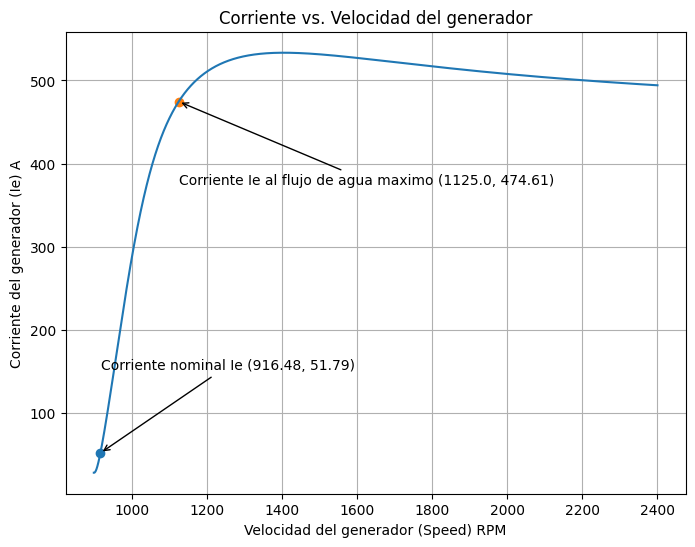

In [134]:
Speed = np.linspace(899, 2400, 4000)
Sn_plot=(Ns-Speed)/Ns

Rr_plot= (R1*R2*(R1+R2)+(Sn_plot**2)*(R1*X2**2+R2*X1**2)) / ((R1+R2)**2+(Sn_plot)**2*(X1+X2)**2)
Xr_plot = (R1**2 * X2 + R2**2 * X1 + (Sn_plot**2) * X1 * X2 * (X1 + X2)) / ((R1 + R2)**2 + (Sn_plot**2) * (X1 + X2)**2)

pp0=(1j*Xm*((Rr_plot/Sn_plot)+1j*Xr_plot))/(1j*Xm+((Rr_plot/Sn_plot)+1j*Xr_plot))

Zeq_plot=Rs+1j*Xs+(pp0)
r_plot = abs(Zeq_plot)
Ie = 380/r_plot

plt.figure(figsize=(8, 6))
plt.plot(Speed, Ie)
plt.xlabel('Velocidad del generador (Speed) RPM')
plt.ylabel('Corriente del generador (Ie) A')
plt.title('Corriente vs. Velocidad del generador')
plt.scatter(punto_de_cruce[0], y1 )
plt.annotate('Corriente nominal Ie ({}, {})'.format(round(punto_de_cruce[0],2), round(y1,2)),
             xy=(punto_de_cruce[0], y1),
             xytext=(punto_de_cruce[0]+1, y1+100),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.scatter(Nn2, r1)
plt.annotate('Corriente Ie al flujo de agua maximo ({}, {})'.format(round(Nn2,2), round(r1,2)),
             xy=(Nn2, r1),
             xytext=(Nn2+1, r1-100),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.grid(True)
plt.show()

In [135]:
## punto D
Pout_N = 380*y1*np.cos(z1)
fp = np.cos(z1)
print(f"Potencia de salida: {Pout_N} ")
print(f"Factor de potencia a carga nominal: {np.cos(z1)}")

Potencia de salida: -14444.780730192073 
Factor de potencia a carga nominal: -0.7340126470566387


In [136]:
## punto D
Pout_N2 = 380*r1*np.cos(theta1)
fp2 = np.cos(theta1)
print(f"Potencia de salida: {Pout_N2} ")
print(f"Factor de potencia a carga nominal: {np.cos(z1)}")

Potencia de salida: -34248.460316864395 
Factor de potencia a carga nominal: -0.7340126470566387


# **<font color="black"><center>El factor de potencia a velocidad nominal en el generador es 0.7364 en adelanto**

In [137]:
S_aparante = Pout_N / fp

In [138]:
angulo_rad = np.arccos(fp)

In [139]:
angulo_corre = np.arccos(1)

In [140]:
Q = Pout_N * np.tan(angulo_rad)
Q2 = Pout_N * np.tan(angulo_corre)

In [141]:
Qc = Q - Q2

In [142]:
C = Qc / ( 2 * np.pi * 60 * 380**2)
C

0.0002455080421291457

In [146]:
## comprobacion grafica

Snprueba = (900-1400)/900

Rr_prueba =(R1*R2*(R1+R2)+Snprueba**2*(R1*X2**2+R2*X1**2)) / ((R1+R2)**2+Snprueba**2*(X1+X2)**2)
Xr_prueba = (R1**2 * X2 + R2**2 * X1 + Snprueba**2 * X1 * X2 * (X1 + X2)) / ((R1 + R2)**2 + Snprueba**2 * (X1 + X2)**2)

pp_prueba=(1j*Xm*((Rr_prueba/Snprueba)+1j*Xr_prueba))/(1j*Xm+((Rr_prueba/Snprueba)+1j*Xr_prueba))
Zeq_prueba=Rs+1j*Xs+(pp_prueba)
Is_prueba = 380/Zeq_prueba

rprueba, thetaprueba = abs(Is_prueba), cmath.phase(Is_prueba)

Pout_prueba = 380*rprueba*np.cos(thetaprueba)
Pout_prueba

58142.79487426813

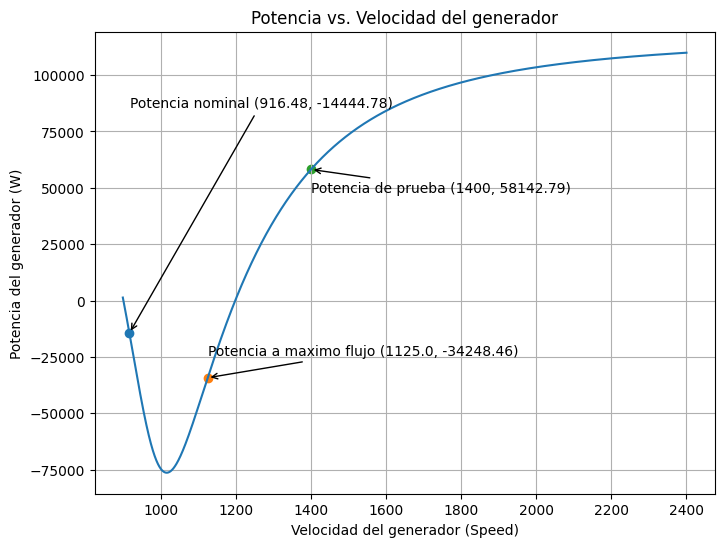

In [160]:
Speed = np.linspace(899, 2400, 4000)
Sn_plot=(Ns-Speed)/Ns

Rr_plot =(R1*R2*(R1+R2)+Sn_plot**2*(R1*X2**2+R2*X1**2)) / ((R1+R2)**2+Sn_plot**2*(X1+X2)**2)
Xr_plot = (R1**2 * X2 + R2**2 * X1 + Sn_plot**2 * X1 * X2 * (X1 + X2)) / ((R1 + R2)**2 + Sn_plot**2 * (X1 + X2)**2)

pp_plot=(1j*Xm*((Rr_plot/Sn_plot)+1j*Xr_plot))/(1j*Xm+((Rr_plot/Sn_plot)+1j*Xr_plot))
Zeq_plot=Rs+1j*Xs+(pp_plot)
Is_plot = 380/Zeq_plot

yplot = [abs(element) for element in Is_plot]
zplot = [cmath.phase(element) for element in Is_plot]
yplot = np.interp(Speed, np.linspace(Speed.min(), Speed.max(), len(yplot)), yplot)

Pout_plot = 380*yplot*np.cos(zplot)


plt.figure(figsize=(8, 6))
plt.plot(Speed, Pout_plot)
plt.xlabel('Velocidad del generador (Speed)')
plt.ylabel('Potencia del generador (W)')
plt.title('Potencia vs. Velocidad del generador')
plt.scatter(punto_de_cruce[0],Pout_N)
plt.annotate('Potencia nominal ({}, {})'.format(round(punto_de_cruce[0],2), round(Pout_N,2)),
             xy=(punto_de_cruce[0], Pout_N),
             xytext=(punto_de_cruce[0]+1, Pout_N+100000),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.scatter(Nn2,Pout_N2)
plt.annotate('Potencia a maximo flujo ({}, {})'.format(round(Nn2,2), round(Pout_N2,2)),
             xy=(Nn2, Pout_N2),
             xytext=(Nn2+1, Pout_N-10000),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.scatter(1400, Pout_prueba)
plt.annotate('Potencia de prueba ({}, {})'.format(round(1400,2), round(Pout_prueba,2)),
             xy=(1400, Pout_prueba),
             xytext=(1400+1, Pout_prueba-10000),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.grid(True)
plt.show()